In [1]:
from price_generator import  generate_spread_path
import numpy as np
import matplotlib.pyplot as plt
from filter import Filter

# Simulate Calendar Spreads

Considering 2 scenarios:

1. Rolling Futures
2. Not Rolling Futures


No handles with labels found to put in legend.


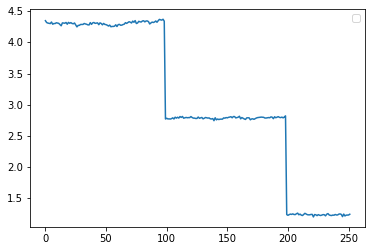

In [35]:
x0, a, l, sig, k, dt = 4, 0.09, 0.37, 0.43, 0.03, 1/252.
c1,c2,c3,c4 = 1.2,-0.19,0.1,-0.34
q = 0.01
n_steps = 252
Tn=[140/360., 180/360.*3]
price_path = generate_spread_path(x0, a, l, sig, k, dt, Tn, c1, c2, c3, c4, q, n_steps, rolling=False, seed=int(np.random.uniform(0,10000)))
# plt.plot(price_path[0])
plt.plot(price_path[1])
plt.legend()

In [3]:
our_filter = Filter(a, l, sig, q, k, c1, c2, c3, c4, dt)

In [36]:
pnn1, pn1n1 = 1, 1
results = []
for i in range(len(price_path[0])-1):
    yn, xnn1, xnn,  T1, T2 = price_path[0][i],price_path[1][i],price_path[1][0], price_path[2][i][0],price_path[2][i][1]
    if i>0:
        xnn = results[i-1][0]
    xnn1, xnn, pn1n, pnn = our_filter.one_step(yn, xnn1, xnn, pnn1, pn1n1, T1, T2)
    results.append((xnn1, xnn, pn1n, pnn))

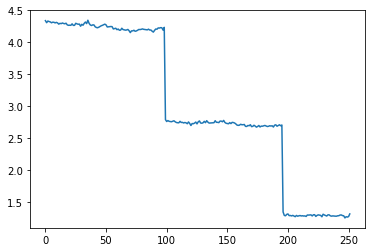

In [33]:
plt.plot(np.array(results).T[0])

In [26]:
res = np.array(results)